## Department wise Library Usage (Students)
Usally, there are 60 students (not counting lateral entry students) in each batch per each department. Here we are finding how many  of these students have checked in library for atleast once. 
- You can pick "batch" from the slider. 
- Batch of a student is the year s/he joined the college, except for lateral entry students. 

In [46]:
import pandas as pd
import matplotlib.pyplot as plt


In [47]:
data = pd.read_csv("src/clean6_library_users.csv")

In [48]:
batch = 2021

In [49]:
# function to add lables above bar plot
def addlabels(x, y):
	for i in range(len(x)):
		plt.text(i, y[i], y[i], ha='center')


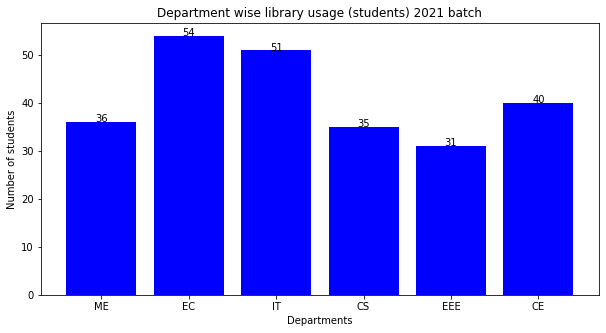

In [50]:
df = data.loc[data["batch"] == batch]

dept_names = ['ME', 'EC', 'IT', 'CS', 'EEE', 'CE']

entries = []

# Counting students per department
for i in dept_names:
    try:
        count = df["department"].value_counts()[i]
        entries.append(count)
    except KeyError:
        entries.append(0)

# Setting figure size
plt.figure(figsize=(10, 5))

# Making bar chart
plt.bar(dept_names, entries, color="b")

# Adding count above bar
addlabels(dept_names, entries)

plt.title(f"Department wise library usage (students) {batch} batch")
plt.xlabel("Departments")
plt.ylabel("Number of students")

plt.show()


In [51]:
if (int(batch) < 2021):
    print("* Civil department was started in 2021")
    if (int(batch) < 2016):
        print("* EEE department was started in 2016")

We see that in most cases, more than 50% of students have checked in library for atleast once. 

## Departmentwise library usage (Staff)

Here we are doing the same analysis but with staffs. There are some points to consider;
- Number of staffs in each department may vary.
- 'Batch' variable is not valid for staff. So cumulative count is taken.

In [52]:
# # Find unique departments of staffs
# df2 = data[data["type"] == "staff"]["department"].unique()
# df2

In [53]:
staff_depts = ['ELECTRONICS AND COMMUNICATION', 'ECONOMICS',
               'COMPUTER SCIENCE', 'GENERAL', 'Ph.D', 'ELECTRICAL',
               'INFORMATION TECHNOLOGY', 'MECHANICAL', 'CENTRAL LIBRARY', 'CIVIL',
               'MATHEMATICS', 'CHEMISTRY']


In [54]:
df3 = data[data["type"] == "staff"]


entries = []

# Counting students per department
for i in staff_depts:
    try:
        count = df3["department"].value_counts()[i]
        entries.append(count)
    except KeyError:
        entries.append(0)


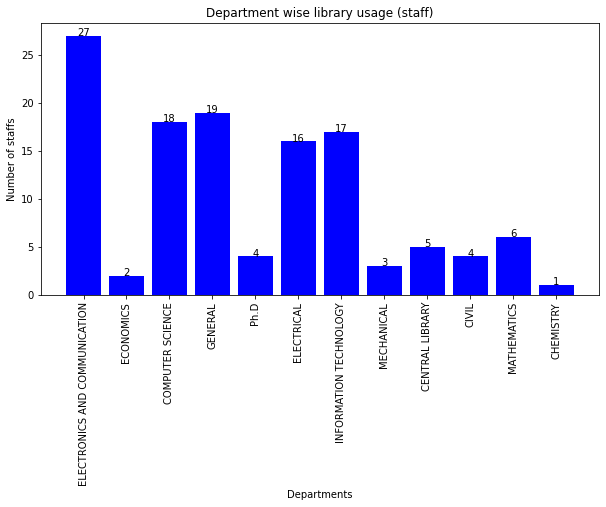

In [55]:
# Setting figure size
plt.figure(figsize=(10, 5))

# Making bar chart
plt.bar(staff_depts, entries, color="b")

# Adding count above bar
addlabels(staff_depts, entries)

plt.title(f"Department wise library usage (staff)")
plt.xlabel("Departments")
plt.ylabel("Number of staffs")

# Rotate labels for better view
plt.xticks(range(len(staff_depts)), staff_depts, rotation='vertical')

plt.show()


So far we have taken the count of users who checked in library (at least once). There are a few things to consider at this point;
- Check in check out scanner wasn't functioning for a few months. 
- Some users may skip the check-in chek-out process. 

So actual count could be slightly higher.

A solution for a more reliable result is to do the analysis on book issue details instead of login details. Since this record is managed by library authorities, chance of errors is low.

## Department-wise book issues (Students)

In [56]:
bk_issue_std = pd.read_csv("src/bkIssue_libUser_bkDetails.csv")

In [57]:
# Filtering data
df4 = bk_issue_std[(bk_issue_std["type"] == "student") & (bk_issue_std["batch"] == batch)]
# df4

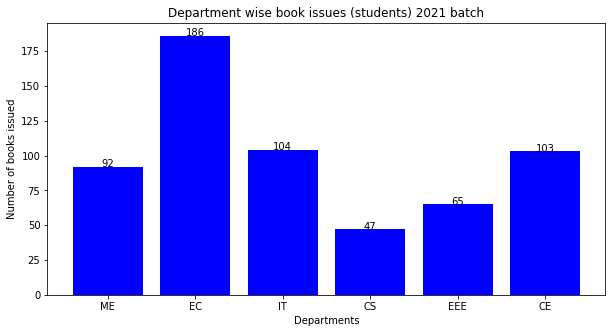

In [58]:
entries = []

# Counting students per department
for i in dept_names:
    try:
        count = df4["department"].value_counts()[i]
        entries.append(count)
    except KeyError:
        entries.append(0)

# Setting figure size
plt.figure(figsize=(10, 5))

# Making bar chart
plt.bar(dept_names, entries, color="b")

# Adding count above bar
addlabels(dept_names, entries)

plt.title(f"Department wise book issues (students) {batch} batch")
plt.xlabel("Departments")
plt.ylabel("Number of books issued")

plt.show()


In [59]:
if (int(batch) < 2021):
    print("* Civil department was started in 2021")
    if (int(batch) < 2016):
        print("* EEE department was started in 2016")


Figure shows number of book issues to each department in selected batch. 
- For example, 2163 books were issued to CS 2016 batch.

## Department-wise book issues (Staff)

In [60]:
# Filtering data
df5 = bk_issue_std[(bk_issue_std["type"] == "staff")]
# df5


In [61]:
entries = []

# Counting students per department
for i in staff_depts:
    try:
        count = df5["department"].value_counts()[i]
        entries.append(count)
    except KeyError:
        entries.append(0)


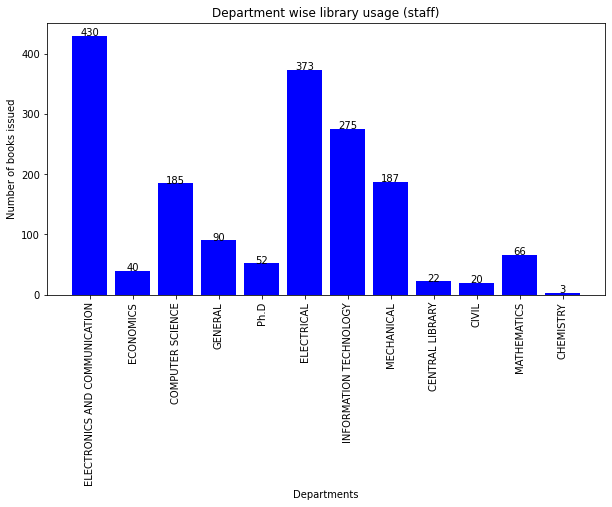

In [63]:
# Setting figure size
plt.figure(figsize=(10, 5))

# Making bar chart
plt.bar(staff_depts, entries, color="b")

# Adding count above bar
addlabels(staff_depts, entries)

plt.title(f"Department wise library usage (staff)")
plt.xlabel("Departments")
plt.ylabel("Number of books issued")

# Rotate labels for better view
plt.xticks(range(len(staff_depts)), staff_depts, rotation='vertical')

plt.show()


Here, as we mentioned already, cumulative count is taken. We see that most number of books are issued to Electronics and Communication Department.